# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import linregress
 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_complete = pd.merge(study_results,mouse_metadata, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
#sorted_results=study_results_complete.sort_values(by='Timepoint')
study_results_complete.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [285]:
# Checking the number of mice.
study_results_complete["Mouse ID"].nunique()



249

In [286]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=study_results_complete[study_results_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [287]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results_complete.loc[study_results_complete["Mouse ID"]=='g989']



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [288]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean = study_results_complete[study_results_complete["Mouse ID"] != 'g989']


In [289]:
# Checking the number of mice in the clean DataFrame.
study_results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [290]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
per_drug_mean = study_results_clean.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
per_drug_median = study_results_clean.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
per_drug_variance = study_results_clean.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
per_drug_std_dev =study_results_clean.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
per_drug_mean_std_err =  study_results_clean.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary ={
    'Mean Tumor Volume': per_drug_mean,
    'Median Tumor Volume':per_drug_median,
    'Tumor Volume Variance':per_drug_variance,
    'Tumor Volume Std. Dev.':per_drug_std_dev,
    'Tumor Volume Std. Err.':per_drug_mean_std_err

}
drug_summary = pd.DataFrame(summary)
drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
result = study_results_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
study_results_clean["Drug Regimen"].unique()
result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice Tested')]

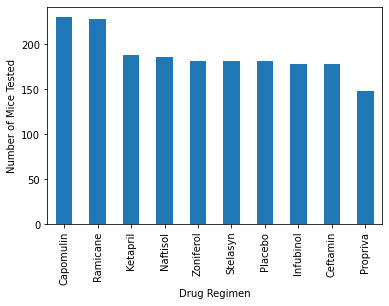

In [292]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda_barplotdf = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
#panda_barplot.sort_values(ascending=False)
panda_barplot=panda_barplotdf.plot(kind='bar')
panda_barplot.set(ylabel='Number of Mice Tested')







Text(0, 0.5, 'Number of Mice Tested')

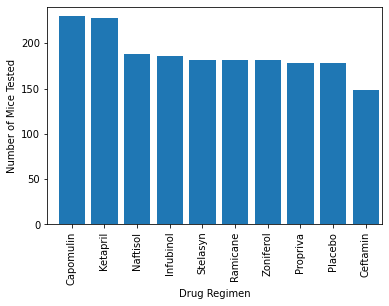

In [293]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_tested = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
drugs= study_results_clean["Drug Regimen"].unique()
plt.bar(range(len(drugs)),number_tested)
plt.xlim(-0.75,9.5)
plt.ylim(0, max(number_tested)+10)
plt.xticks(range(len(drugs)),drugs ,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
#['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']


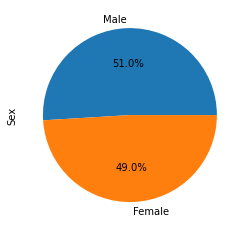

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = study_results_clean['Sex'].value_counts()
#gender_count_total=study_results_clean['Sex'].count()
panda_pie=gender_count.plot.pie(autopct='%1.1f%%')
#percent = gender_count / gender_count_total
panda_pie




Text(0, 0.5, 'Sex')

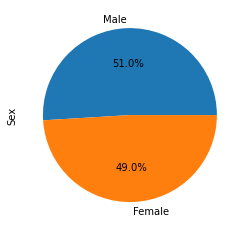

In [295]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = study_results_clean.sort_values(by=['Sex'],ascending=False)['Sex'].unique()
#male=gender_count.value_counts()
plt.pie(gender_count,labels=pie_labels,autopct='%1.1f%%')
plt.ylabel("Sex")
#pie_labels
#gender_count





## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



study_results_clean.sort_values(by=['Mouse ID','Timepoint'], ascending=[True,True], inplace=True)
mouse_group=study_results_clean.groupby(["Mouse ID"])['Tumor Volume (mm3)'].last()
#mouse_group
study_results_clean = pd.merge(study_results_clean,mouse_group, how='left',on='Mouse ID')




c:\Users\ASROCK Z590M Phantom\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [297]:

study_results_clean.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume (mm3)','Tumor Volume (mm3)_y':'Final Tumor Volume(mm3)'},inplace=True)
study_results_clean.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume(mm3)
0,a203,0,45.000000,0,Infubinol,Female,20,23,67.973419
1,a203,5,48.508468,0,Infubinol,Female,20,23,67.973419
2,a203,10,51.852437,1,Infubinol,Female,20,23,67.973419
3,a203,15,52.777870,1,Infubinol,Female,20,23,67.973419
4,a203,20,55.173336,1,Infubinol,Female,20,23,67.973419
5,a203,25,56.793208,1,Infubinol,Female,20,23,67.973419
6,a203,30,59.523197,1,Infubinol,Female,20,23,67.973419
7,a203,35,61.931650,2,Infubinol,Female,20,23,67.973419
8,a203,40,63.593490,2,Infubinol,Female,20,23,67.973419
9,a203,45,67.973419,2,Infubinol,Female,20,23,67.973419


In [298]:
# Put treatments into a list for for loop (and later for plot labels)
filtered_results=study_results_clean[(study_results_clean['Drug Regimen']=='Capomulin') | (study_results_clean['Drug Regimen']=='Ramicane') | (study_results_clean['Drug Regimen']=='Infubinol') | (study_results_clean['Drug Regimen']=='Ceftamin')]
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments=filtered_results["Drug Regimen"].unique()


# Create empty list to fill with tumor vol data (for plotting)
#capomulin_volume=filtered_results[filtered_results['Drug Regimen']=='Capomulin']['Final Tumor Volume(mm3)']
#ramicane_volume=filtered_results[filtered_results['Drug Regimen']=='Ramicane']['Final Tumor Volume(mm3)']
#infubinol_volume=filtered_results[filtered_results['Drug Regimen']=='Infubinol']['Final Tumor Volume(mm3)']
#ceftamin_volume=filtered_results[filtered_results['Drug Regimen']=='Ceftamin']['Final Tumor Volume(mm3)']
""" tumor_volume=[]
capomulin_outliers=[]
ramicane_outliers=[]
infubinol_outliers=[]
ceftamin_outliers=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    tumor_volume=filtered_results[filtered_results['Drug Regimen']==drugs]['Tumor Volume (mm3)']
    
    lowerq=np.quantile(tumor_volume,.25)
    upperq=np.quantile(tumor_volume,.75)
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if drugs == 'Capomulin':
        capomulin_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))]
    elif drugs == 'Ramicane':
        ramicane_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))]
    elif drugs=='Infubinol':
        infubinol_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))]
    else:
        ceftamin_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))] """



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

" tumor_volume=[]\ncapomulin_outliers=[]\nramicane_outliers=[]\ninfubinol_outliers=[]\nceftamin_outliers=[]\n\n\n# Calculate the IQR and quantitatively determine if there are any potential outliers. \nfor drugs in treatments:\n    tumor_volume=filtered_results[filtered_results['Drug Regimen']==drugs]['Tumor Volume (mm3)']\n    \n    lowerq=np.quantile(tumor_volume,.25)\n    upperq=np.quantile(tumor_volume,.75)\n    iqr=upperq-lowerq\n    lower_bound = lowerq - (1.5*iqr)\n    upper_bound = upperq + (1.5*iqr)\n    if drugs == 'Capomulin':\n        capomulin_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))]\n    elif drugs == 'Ramicane':\n        ramicane_outliers=filtered_results[(filtered_results['Drug Regimen']==drugs) & ((filtered_results['Tumor Volume (mm3)'] < lower_bound) | (filtered_results['Tumor Volume (mm3)'] > upper_bound))]\n    elif drugs=='I

In [299]:
#ramicane_outliers

In [300]:
tumor_volume=[]
capomulin_outliers=[]
ramicane_outliers=[]
infubinol_outliers=[]
ceftamin_outliers=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    tumor_volume = filtered_results.loc[filtered_results["Drug Regimen"] == drugs, 'Final Tumor Volume(mm3)']

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if drugs == 'Capomulin':
        capomulin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    elif drugs == 'Ramicane':
        ramicane_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    elif drugs=='Infubinol':
        infubinol_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    else:
        ceftamin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

In [301]:
""" tumor_volume=[]
capomulin_outliers=[]
ramicane_outliers=[]
infubinol_outliers=[]
ceftamin_outliers=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    tumor_volume = filtered_results.loc[filtered_results["Drug Regimen"] == drugs, 'Tumor Volume (mm3)']

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = np.quantile(tumor_volume,.25)
    upperq = np.quantile(tumor_volume,.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if drugs == 'Capomulin':
        capomulin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    elif drugs == 'Ramicane':
        ramicane_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    elif drugs=='Infubinol':
        infubinol_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    else:
        ceftamin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)] """

' tumor_volume=[]\ncapomulin_outliers=[]\nramicane_outliers=[]\ninfubinol_outliers=[]\nceftamin_outliers=[]\n\n\n# Calculate the IQR and quantitatively determine if there are any potential outliers. \nfor drugs in treatments:\n    tumor_volume = filtered_results.loc[filtered_results["Drug Regimen"] == drugs, \'Tumor Volume (mm3)\']\n\n    quartiles = tumor_volume.quantile([.25,.5,.75])\n    lowerq = np.quantile(tumor_volume,.25)\n    upperq = np.quantile(tumor_volume,.75)\n    iqr = upperq-lowerq\n    lower_bound = lowerq - (1.5*iqr)\n    upper_bound = upperq + (1.5*iqr)\n    if drugs == \'Capomulin\':\n        capomulin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]\n    elif drugs == \'Ramicane\':\n        ramicane_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]\n    elif drugs==\'Infubinol\':\n        infubinol_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]\n 

In [303]:
infubinol_outliers.describe()

count     2.000000
mean     36.321346
std       0.000000
min      36.321346
25%      36.321346
50%      36.321346
75%      36.321346
max      36.321346
Name: Final Tumor Volume(mm3), dtype: float64

In [312]:
ramicane_outliers.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Final Tumor Volume(mm3), dtype: float64

In [311]:
capomulin_outliers.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Final Tumor Volume(mm3), dtype: float64

In [306]:
ceftamin_outliers.describe()

count    13.000000
mean     46.985483
std       1.560721
min      45.000000
25%      45.000000
50%      46.784535
75%      48.722078
max      48.722078
Name: Final Tumor Volume(mm3), dtype: float64

Capomulin         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Ceftamin     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Infubinol             AxesSubplot(0.1,0.15;0.363636x0.340909)
Ramicane         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

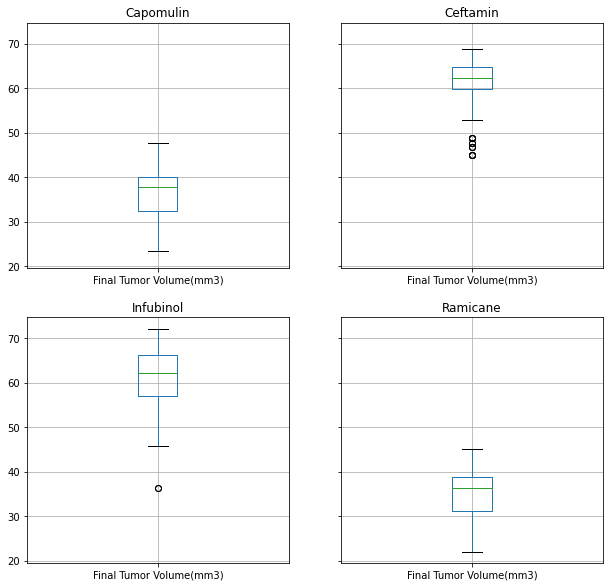

In [307]:
filtered_results.groupby('Drug Regimen').boxplot(column='Final Tumor Volume(mm3)',figsize=(10,10))

## Line and Scatter Plots

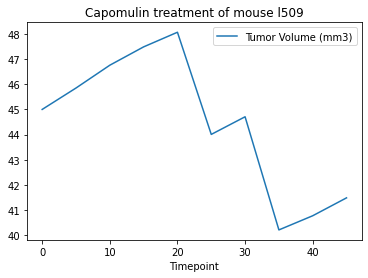

In [336]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_graph = filtered_results[filtered_results['Mouse ID'] == 'l509'][['Tumor Volume (mm3)','Timepoint']]

mouse_graph.plot.line(x='Timepoint',y='Tumor Volume (mm3)',title='Capomulin treatment of mouse l509')




Text(0, 0.5, 'Average Tumor Volume (mm3)')

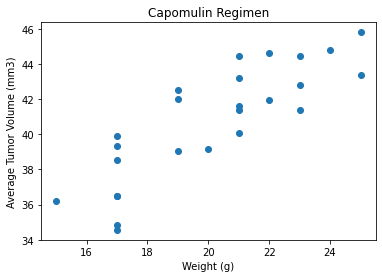

In [378]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df=filtered_results[filtered_results['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=filtered_results[filtered_results['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(x_values,y_values)
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

In [384]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

scatter_df=filtered_results[filtered_results['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=filtered_results[filtered_results['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID').mean()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

ValueError: too many values to unpack (expected 4)